In [1]:
%matplotlib nbagg
import warnings
import inspect
import matplotlib.pyplot as plt
import IPython.display
import numpy as np
import math

In [2]:
from cued_sf2_lab.jpeg import jpegenc

from cued_sf2_lab.dct import dct_ii
from cued_sf2_lab.laplacian_pyramid import bpp
from cued_sf2_lab.laplacian_pyramid import quantise
from cued_sf2_lab.dct import regroup

# import schemes
from cued_sf2_lab.schemes.LBT_chen import LBT

<IPython.core.display.Javascript object>


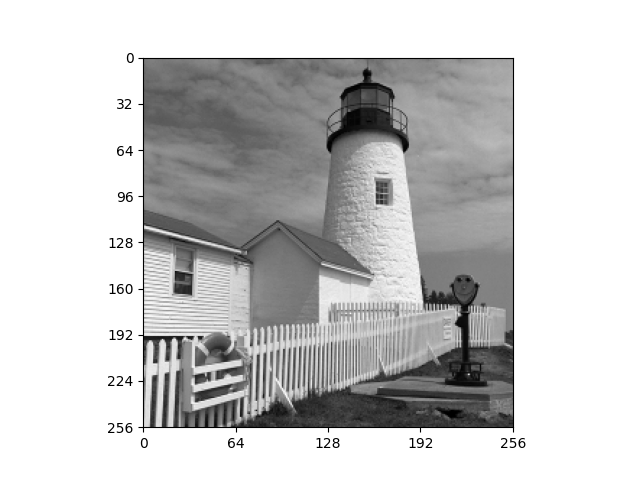

In [3]:
# load in the image
from cued_sf2_lab.familiarisation import load_mat_img, plot_image
X, _ = load_mat_img('lighthouse.mat', img_info='X')
X = X - 128.0

fig, ax = plt.subplots()
plot_image(X, ax=ax)

<IPython.core.display.Javascript object>


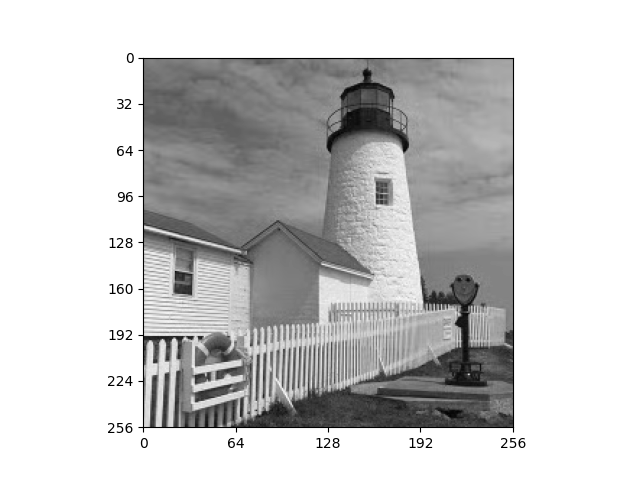

In [6]:

N = 8

lbt = LBT(X, N)

Y = lbt.encode()

step = 17
Yq = quantise(Y, step)

Z = lbt.decode(Yq)

fig, ax = plt.subplots()
plot_image(Z, ax=ax)

In [7]:
vlc, hufftab = jpegenc(X, 17, N = 4, M = 8, opthuff=True)

Forward 4 x 4 DCT
Quantising to step size of 17
Generating huffcode and ehuf using default tables
Coding rows
Generating huffcode and ehuf using custom tables
Coding rows (second pass)
Bits for coded image = 81468
Bits for huffman table = 1424


In [8]:
N_arr = [4, 8, 16]

print('optimum step')
for N in N_arr:
    print('{}x{}:'.format(N, N), lbt.get_optimum_step(X, N))

optimum step
4x4: 30.409736786777376
8x8: 26.411264470385806
16x16: 23.189964686963556


In [9]:
print('compression ratios with optimum step')
for N in N_arr:
    cr = lbt.get_cr_with_opt_step(X, N)
    print('{}x{}:'.format(N, N), cr)

compression ratios with optimum step
228119.03651868744 64297.83966454443
4x4: 3.547849161166739
228119.03651868744 67892.57437108239
8x8: 3.359999803098505
228119.03651868744 78640.30553274853
16x16: 2.9007903132280024
